In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import seaborn as sns
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from highlight_text import HighlightText, ax_text, fig_text

In [3]:
#import data using pandas

data = pd.read_excel('Openda Data 77 Matches.xlsx')

In [4]:
data

,Match day,Date,Season,League,Opponent,Side,Full Name,Team,Assists,Mins played,...,SGA,Goals prevented per xGoT,xA,opxA,xOVA,xThreat,xThreat from passes,xThreat from carries,Match Num,RA
0,1,2020-09-13 15:45:00,2020,Eredivisie,RKC Waalwijk,Away,Lois Openda,Vitesse,NaN,65,...,-0.032799,NaN,0.005424,0.005424,0.009599,0.031235,-0.003233,0.034468,1,NaN
1,2,2020-09-19 17:45:00,2020,Eredivisie,Sparta Rotterdam,Home,Lois Openda,Vitesse,NaN,89,...,0.023455,NaN,0.117578,0.117578,0.265997,0.108638,-0.018354,0.126991,2,NaN
2,3,2020-09-26 20:00:00,2020,Eredivisie,Ajax,Away,Lois Openda,Vitesse,NaN,90,...,0.005858,NaN,0.105358,0.105358,0.263866,0.068269,0.027114,0.041155,3,NaN
3,4,2020-10-03 15:30:00,2020,Eredivisie,Heracles Almelo,Home,Lois Openda,Vitesse,1.0,74,...,0.283454,NaN,0.332605,0.331330,0.499815,0.049767,0.063520,-0.013752,4,NaN
4,5,2020-10-18 13:30:00,2020,Eredivisie,ADO Den Haag,Away,Lois Openda,Vitesse,NaN,71,...,0.105602,NaN,0.002069,0.002069,0.114172,-0.034038,-0.030922,-0.003116,5,0.359221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,3,2022-08-20 16:00:00,2022,Ligue 1,Monaco,Away,Lois Openda,Lens,NaN,75,...,0.218959,NaN,0.417857,0.417857,0.523671,0.300271,0.143445,0.156826,73,0.350828
73,4,2022-08-27 20:00:00,2022,Ligue 1,Rennes,Home,Lois Openda,Lens,NaN,76,...,0.335952,NaN,0.016368,0.016368,0.202443,0.147135,-0.000622,0.147757,74,0.443220
74,5,2022-08-31 20:00:00,2022,Ligue 1,Lorient,Home,Lois Openda,Lens,NaN,46,...,-0.016958,NaN,0.000572,0.000572,0.108449,0.114973,-0.008580,0.123553,75,0.437016
75,6,2022-09-04 14:00:00,2022,Ligue 1,Reims,Away,Lois Openda,Lens,NaN,90,...,0.129193,NaN,0.106746,0.106746,1.056904,0.115279,0.034509,0.080770,76,0.691922


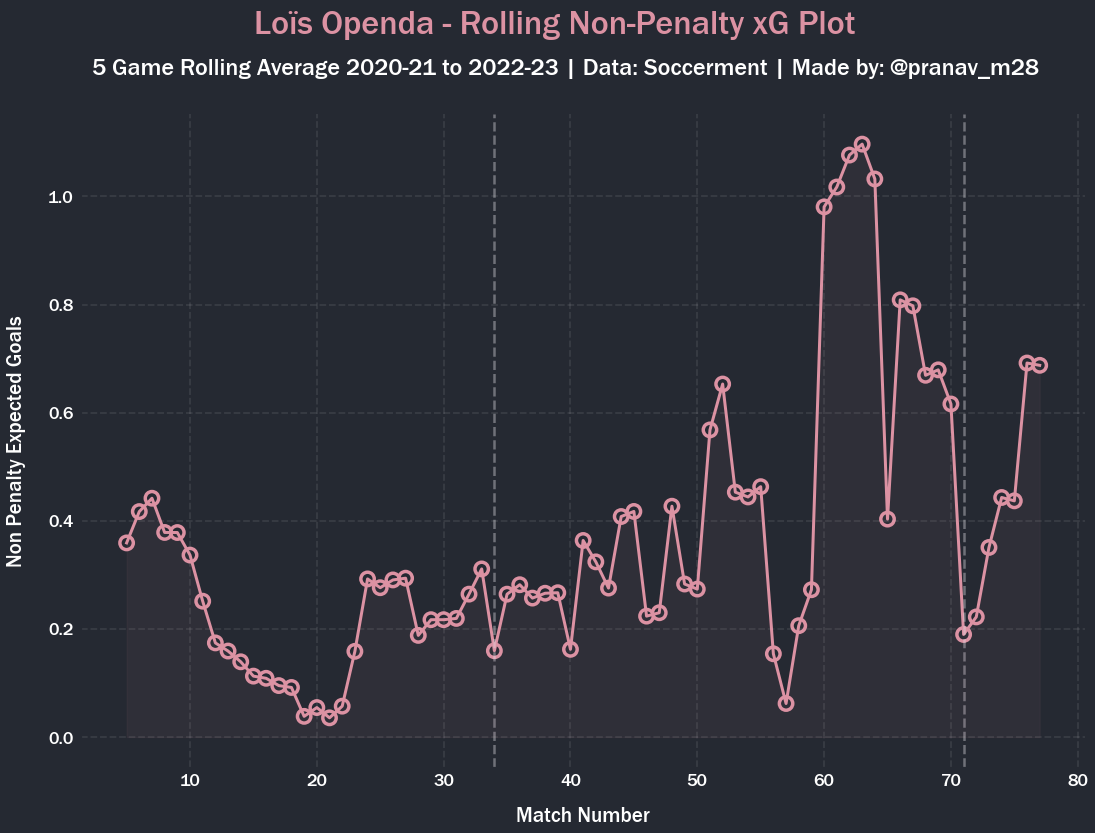

In [7]:
#choose a suitable figure size, I prefer (18,12) as it looks better.

plt.figure(figsize=(18,12))

#Create a basic line plot and adjust the color, linewidth (lw) according to your preferences.

plt.plot(data['Match Num'] , data['RA'] , color='#DC92A3' , lw=3.0 , zorder=2)

#Use the line below to fill some color between the line and the axes.

plt.fill_between(data['Match Num'] , data['RA'] , color='#DC92A3' , alpha=0.06 , zorder=3)

#Add scatter points that indicate matches.

plt.scatter(data['Match Num'] , data['RA'] , s=180 , color='none' , edgecolor='#DC92A3' , lw=3.45)


#remove ticks

plt.tick_params(bottom = False)
plt.tick_params(left = False)


plt.xticks(font='Franklin Gothic Medium' ,fontsize=18 , color="#FFFFFF" , fontweight='bold')
plt.yticks(font='Franklin Gothic Medium' ,fontsize=18 , color="#FFFFFF" , fontweight='bold')

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

#change the hex value in the code below to change the background color
#plt.rcParams[param] = '#252932', use #000000 for a perfectly black background
#if you want to see axis lines, change the hex in this line: mpl.rc('axes',edgecolor='#252932' , linewidth=1.2), else keep it the same.

plt.style.use("dark_background")
mpl.rc('axes',edgecolor='#252932' , linewidth=1.2)
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#252932' 
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'
    

plt.grid(color='#e9e8ed' , alpha=0.10 , zorder=1 , linestyle='--' , lw=1.8)

#add lines to show the beginning of a new season

plt.axvline(34 , ls='--', lw=2.5, color="#e9e8ed" , alpha=0.38)
plt.axvline(71 , ls='--', lw=2.5, color="#e9e8ed" , alpha=0.38)

#give axes labels

plt.ylabel('Non Penalty Expected Goals' , font='Franklin Gothic Medium' , fontsize=21 , fontweight='bold' , color='#FFFFFF' , labelpad=22)

plt.xlabel('Match Number' , font='Franklin Gothic Medium' , fontsize=21 , fontweight='bold' , color='#FFFFFF' , labelpad=18)


fig_text(
    0.491, 1.00, "<Loïs Openda - Rolling Non-Penalty xG Plot>", font='Franklin Gothic Medium' , size=34,
    ha="center", color="#FFFFFF" , fontweight='bold' , highlight_textprops=[{"color": '#DC92A3'}]
)

fig_text(
    0.499, 0.945,
    "5 Game Rolling Average 2020-21 to 2022-23 | Data: Soccerment | Made by: @pranav_m28",
    font='Franklin Gothic Medium' , size=24,
    ha="center", color="#FFFFFF" , fontweight='bold'
)

plt.savefig('Openda Rolling npxG Plot.png' , dpi=300 , bbox_inches='tight')